### Edgar Moises Hernandez-Gonzalez
#### 29/03/20-01/04/20
#### Clasificacion de CIFAR10 con Transfer Learning usando VGG16
##### Esta es otra manera de hacer Transfer Learning pero no se recomienda ya que tiene un alto costo computacional y es mejor solo predecir para obtener la extraccion de caracteristicas
##### class_names = ['avion', 'auto', 'pajaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camion']
##### Accuracy = 60.39%

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [4]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 50000
n_samples_test : 10000


In [5]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test
print("n_classes:", n_classes)

n_classes: 10


In [0]:
#convertir a float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#escalar los valores en un rango de 0 a 1 (normalizar)
x_train /= 255.0
x_test /= 255.0

In [0]:
base_model = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=x_train.shape[1:])

In [8]:
for layer in base_model.layers[:]:
  layer.trainable = False

for layer in base_model.layers:
  print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fc679137c88> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc5f08262e8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc5f0826c88> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fc5effe89b0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc5effe8b70> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc5f0002ef0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fc5e0144438> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc5e014db00> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc5e0156160> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc5e015d400> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fc5e015d8d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 

In [0]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 14,748,170
Trainable params: 33,482
Non-trainable params: 14,714,688
_________________________________________________________________


In [11]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128,
                    validation_data=(x_test, y_test), verbose=2)

Epoch 1/20
391/391 - 12s - loss: 1.6246 - accuracy: 0.4323 - val_loss: 1.3561 - val_accuracy: 0.5295
Epoch 2/20
391/391 - 11s - loss: 1.3392 - accuracy: 0.5325 - val_loss: 1.2699 - val_accuracy: 0.5597
Epoch 3/20
391/391 - 11s - loss: 1.2712 - accuracy: 0.5593 - val_loss: 1.2296 - val_accuracy: 0.5720
Epoch 4/20
391/391 - 11s - loss: 1.2293 - accuracy: 0.5717 - val_loss: 1.2114 - val_accuracy: 0.5785
Epoch 5/20
391/391 - 11s - loss: 1.2016 - accuracy: 0.5822 - val_loss: 1.2025 - val_accuracy: 0.5852
Epoch 6/20
391/391 - 11s - loss: 1.1745 - accuracy: 0.5890 - val_loss: 1.1730 - val_accuracy: 0.5907
Epoch 7/20
391/391 - 11s - loss: 1.1598 - accuracy: 0.5956 - val_loss: 1.1687 - val_accuracy: 0.5905
Epoch 8/20
391/391 - 11s - loss: 1.1467 - accuracy: 0.5989 - val_loss: 1.1626 - val_accuracy: 0.5921
Epoch 9/20
391/391 - 11s - loss: 1.1317 - accuracy: 0.6054 - val_loss: 1.1532 - val_accuracy: 0.5996
Epoch 10/20
391/391 - 11s - loss: 1.1219 - accuracy: 0.6092 - val_loss: 1.1515 - val_accura

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 - 3s - loss: 1.1316 - accuracy: 0.6039
Test loss: 1.13157057762146
Test accuracy: 0.6039000153541565


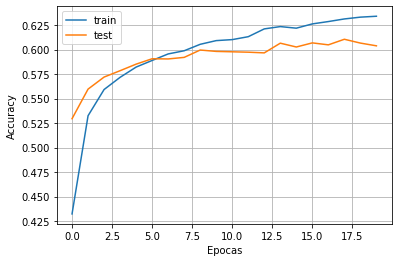

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

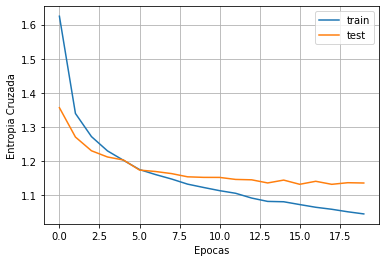

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Entropia Cruzada')
plt.legend(['train', 'test'])
plt.show()

In [0]:
probabilidades = model.predict(x_test)
y_pred = np.argmax(probabilidades, 1) #1=fila

In [16]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[701  29  71  15  12   7  16  25  87  37]
 [ 41 689  18  33   9  13  36  18  38 105]
 [ 74  21 521  55 105  41 121  35  13  14]
 [ 24  40  96 388  51 130 159  36  25  51]
 [ 21  23  98  48 533  21 134  82  26  14]
 [ 11  21  82 173  57 483  74  61   7  31]
 [  8  22  62  48  48  35 751   5  11  10]
 [ 24  18  67  31  88  58  18 647   9  40]
 [108  59  23  12  16   3  13   7 702  57]
 [ 46 148  18  28  17  25  20  36  38 624]]


In [17]:
reporteClassificacion = classification_report(y_test, y_pred)
print(reporteClassificacion)

              precision    recall  f1-score   support

           0       0.66      0.70      0.68      1000
           1       0.64      0.69      0.67      1000
           2       0.49      0.52      0.51      1000
           3       0.47      0.39      0.42      1000
           4       0.57      0.53      0.55      1000
           5       0.59      0.48      0.53      1000
           6       0.56      0.75      0.64      1000
           7       0.68      0.65      0.66      1000
           8       0.73      0.70      0.72      1000
           9       0.63      0.62      0.63      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.60     10000
weighted avg       0.60      0.60      0.60     10000

